In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

## PHASE 1 - Quick Look at Dataset

In [9]:
df = pd.read_csv('classData.csv')
testDf = pd.read_csv('detect_dataset.csv')

In [10]:
df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


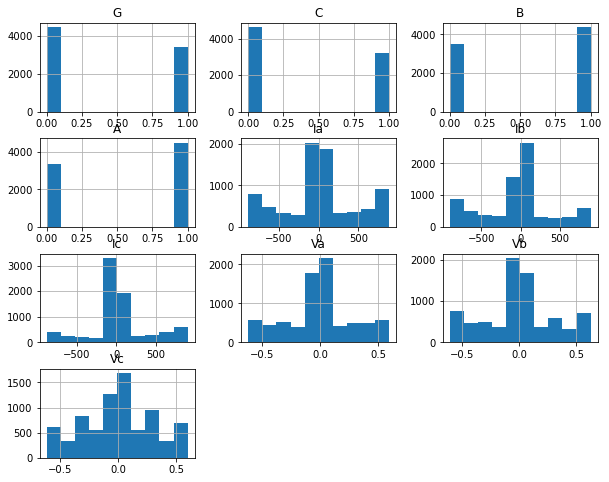

In [11]:
df.hist(bins=10, figsize=(10, 8)) 
plt.show()

In [12]:
# G,C,B and A let us know if there is a fault or not, 0 if no fault else 1
# Ia,Ib and Ic vary from -500 to 500
# Va, Vb and Vc vary from -0.5 to 0.5
# classData.csv is used for training and detect_dataset.csv is used for testing the model

In [13]:
# Generate isFault Column which is 1 when any one of the columns in G,C,B or A is 1
df['isFault'] = (df[['G', 'C', 'B', 'A']] == 1).any(axis=1).astype(int)

# Drop columns G,C,B,A as we are using binary classification
dropColumns = ['G','C','B','A']
df = df.drop(columns = dropColumns)
df

,Ia,Ib,Ic,Va,Vb,Vc,isFault
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1
...,...,...,...,...,...,...,...
7856,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0
7857,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0
7858,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0
7859,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0


In [14]:
# Generate xtrain and ytrain
xtrain = df[['Ia','Ib','Ic','Va','Vb','Vc']]
ytrain = df[['isFault']]

In [15]:
testDf

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11996,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,NaN,NaN
11997,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,NaN,NaN
11998,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,NaN,NaN
11999,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,NaN,NaN


In [16]:
# Generate isFault Column which is 1 when any one of the columns in G,C,B or A is 1 for testing dataset
testDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [17]:
yTest = testDf.iloc[:,0]
yTest.unique()
yTest

0        0
1        0
2        0
3        0
4        0
        ..
11996    0
11997    0
11998    0
11999    0
12000    0
Name: Output (S), Length: 12001, dtype: int64

In [18]:
xTest = testDf.iloc[:,1:-2]

In [19]:
print(xtrain)
print(ytrain)
print(xTest)
print(yTest)

              Ia          Ib          Ic        Va        Vb        Vc
0    -151.291812   -9.677452   85.800162  0.400750 -0.132935 -0.267815
1    -336.186183  -76.283262   18.328897  0.312732 -0.123633 -0.189099
2    -502.891583 -174.648023  -80.924663  0.265728 -0.114301 -0.151428
3    -593.941905 -217.703359 -124.891924  0.235511 -0.104940 -0.130570
4    -643.663617 -224.159427 -132.282815  0.209537 -0.095554 -0.113983
...          ...         ...         ...       ...       ...       ...
7856  -66.237921   38.457041   24.912239  0.094421 -0.552019  0.457598
7857  -65.849493   37.465454   25.515675  0.103778 -0.555186  0.451407
7858  -65.446698   36.472055   26.106554  0.113107 -0.558211  0.445104
7859  -65.029633   35.477088   26.684731  0.122404 -0.561094  0.438690
7860  -64.598401   34.480799   27.250065  0.131669 -0.563835  0.432166

[7861 rows x 6 columns]
      isFault
0           1
1           1
2           1
3           1
4           1
...       ...
7856        0
7857       

## Visualizing the Data

In [20]:
# Visualize relationship between isFault and columns Ia,Ib,Ic,Va,Vb and Vc
columns = ['Ia','Ib','Ic','Va','Vb','Vc']

In [21]:
df

,Ia,Ib,Ic,Va,Vb,Vc,isFault
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1
...,...,...,...,...,...,...,...
7856,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0
7857,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0
7858,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0
7859,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0


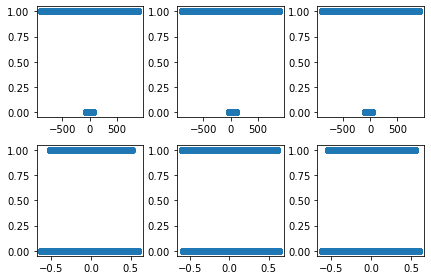

In [22]:
fig, axs = plt.subplots(nrows=2,ncols=3)
k=0

for i in range(2):
    for j in range(3):
        axs[i,j].scatter(df[columns[k]],df['isFault'])
        k=k+1
    

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Faults seem to be independent of voltages

In [23]:
df

,Ia,Ib,Ic,Va,Vb,Vc,isFault
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1
...,...,...,...,...,...,...,...
7856,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0
7857,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0
7858,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0
7859,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0


In [24]:
testDf = testDf.iloc[:, :-2]

In [25]:
xTest

,Ia,Ib,Ic,Va,Vb,Vc
0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050
...,...,...,...,...,...,...
11996,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
11997,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
11998,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
11999,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


## Explore relationships between variables in test dataset

/home/shreyas/miniconda3/envs/ibm/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


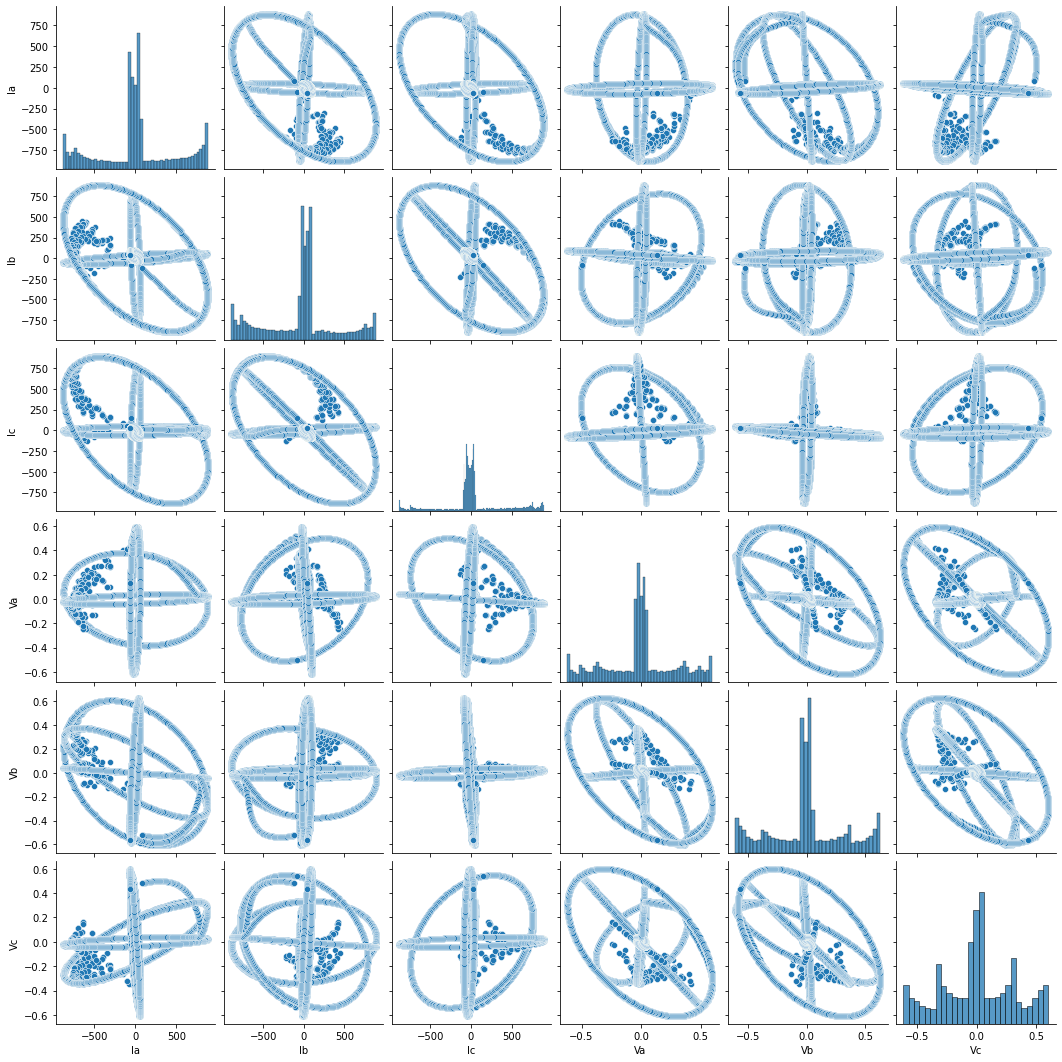

In [26]:
import seaborn as sns
sns.pairplot(xtrain)

##  See relationship between isFault and all columns in xtrain by using scatter plot

In [27]:
randomRows = df.sample(n=1000, random_state=42)

In [28]:
type(randomRows)

pandas.core.frame.DataFrame

In [29]:
# Extract column names
columns = randomRows.columns
columns

Index(['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'isFault'], dtype='object')

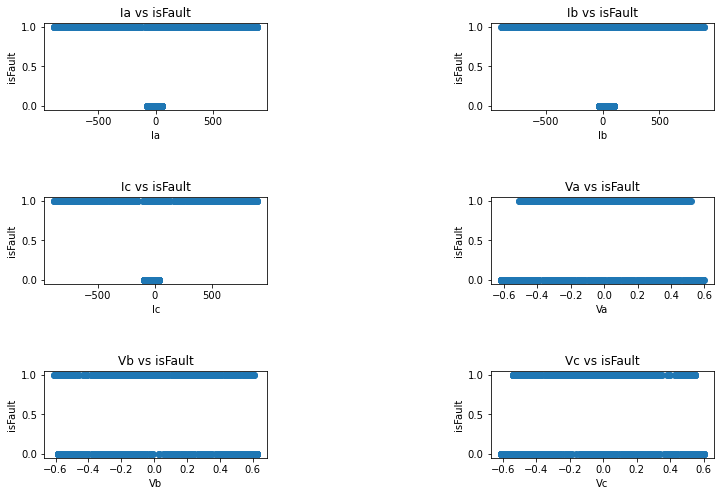

In [30]:
nRows = 3
nCols = 2

figure, axs = plt.subplots(nRows,nCols, figsize=(12, 8)) 
count = 0

for row in range(nRows):
    
    for col in range(nCols):
        
        column = columns[count]
    
        axs[row,col].scatter(randomRows[column],randomRows[columns[-1]])
        axs[row,col].set_title(f'{column} vs {columns[-1]}')
        axs[row,col].set_xlabel(column)
        axs[row,col].set_ylabel(columns[-1])
        
        count = count+1
        

plt.subplots_adjust(hspace=1, wspace=1)
plt.show()

## Visualise the balance of dataset

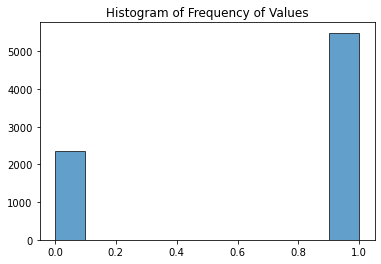

In [31]:
plt.hist(ytrain,edgecolor='black', alpha=0.7)
plt.title('Histogram of Frequency of Values')
plt.show()

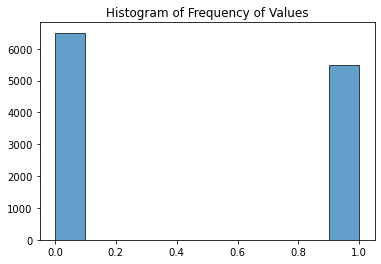

In [32]:
plt.hist(yTest,edgecolor='black', alpha=0.7)
plt.title('Histogram of Frequency of Values')
plt.show()

## Scale the Data

In [33]:
# Scale the data as currents and voltages have different ranges
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

xtrain = scaler.fit_transform(xtrain)
xTest  = scaler.fit_transform(xTest)

In [34]:
## Use xtrain and ytrain for training
## Use xTest and yTest for testing

In [35]:
ytrain = ytrain['isFault'].to_numpy()

In [36]:
yTest = yTest.values

In [37]:
from sklearn.metrics import classification_report

# Logistic Regression Model

In [38]:
clf = LogisticRegression().fit(xtrain, ytrain)

In [39]:
## See accuracy of prediction
from sklearn.metrics import accuracy_score
yPred = clf.predict(xTest)

# Calculate accuracy
accuracy = accuracy_score(yTest, yPred)
accuracy

0.4579618365136239

In [40]:
target_names = ['class 0', 'class 1']
print(classification_report(yTest, yPred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00      6505
     class 1       0.46      1.00      0.63      5496

    accuracy                           0.46     12001
   macro avg       0.23      0.50      0.31     12001
weighted avg       0.21      0.46      0.29     12001



/home/shreyas/miniconda3/envs/ibm/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shreyas/miniconda3/envs/ibm/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shreyas/miniconda3/envs/ibm/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

# Support Vector Machines 

In [51]:
from sklearn import svm 
clfSVM = svm.SVC().fit(xtrain,ytrain)

In [52]:
yPred = clfSVM.predict(xTest)

# Calculate accuracy
accuracy = accuracy_score(yTest, yPred)
accuracy

0.9835013748854262

In [57]:
target_names = ['class 0', 'class 1']
print(classification_report(yTest, yPred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      0.98      0.98      6505
     class 1       0.97      0.99      0.98      5496

    accuracy                           0.98     12001
   macro avg       0.98      0.98      0.98     12001
weighted avg       0.98      0.98      0.98     12001



## KMeans

In [58]:
from sklearn.cluster import KMeans

In [59]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(xtrain)

In [60]:
yPred = kmeans.predict(xTest)

In [61]:
print(classification_report(yTest, yPred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.53      0.49      0.51      6505
     class 1       0.44      0.48      0.46      5496

    accuracy                           0.48     12001
   macro avg       0.48      0.48      0.48     12001
weighted avg       0.49      0.48      0.49     12001



## ANN

In [62]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [64]:
clf = MLPClassifier(random_state=1, max_iter=1000).fit(xtrain, ytrain)
yPred = clf.predict(xTest)

In [65]:
print(classification_report(yTest, yPred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.96      0.98      6505
     class 1       0.95      1.00      0.98      5496

    accuracy                           0.98     12001
   macro avg       0.98      0.98      0.98     12001
weighted avg       0.98      0.98      0.98     12001

